<a href="https://colab.research.google.com/github/msolorzan/Data_science_projects/blob/main/FakeNews_Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de Fake News

Dataset extraído de [Kaggle.com](https://www.kaggle.com/datasets/algord/fake-news) el cual contiene datos e información sobre artículos publicados:
FORMATO: CSV

#### Contenido:

* title: Título del artículo
* news_url: Enlace del artículo
* source_domain: Dominio del artículo publicado
* tweet_num: Número de retweets realizados
* real: Real = 1 o Falso = 0

## Obtener el dataset

### Descomprimiendo el dataset

In [1]:
!unzip /content/drive/MyDrive/Data_science/classification/FakeNewsNet.csv.zip

Archive:  /content/drive/MyDrive/Data_science/classification/FakeNewsNet.csv.zip
  inflating: FakeNewsNet.csv         


## Importando las librerías para manipulación del dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
FakeNews_csv = pd.read_csv('/content/FakeNewsNet.csv')

## Dando un vistazo al formato del dataset

In [4]:
FakeNews_csv.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [5]:
FakeNews_csv.tail()

,title,news_url,source_domain,tweet_num,real
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0
23195,Kelly Clarkson Performs a Medley of Kendrick L...,https://www.billboard.com/articles/news/bbma/8...,www.billboard.com,85,1


## Inspeccionando valores faltantes

In [6]:
FakeNews_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


## Observar los datos nulos

In [7]:
FakeNews_csv.loc[FakeNews_csv['news_url'].isnull()]

,title,news_url,source_domain,tweet_num,real
14,2011 via CQ subscribers only Tax Foundation,NaN,NaN,0,1
72,Patient Protection and Affordable Care Act,NaN,NaN,2437,1
87,Jennifer Lopez Snubbed Vanessa Hudgens On ‘ Se...,NaN,NaN,4,0
177,Gwen Stefani Call Off Blake Shelton,NaN,NaN,85,0
198,Angelina Jolie Attending Royal Wedding Specul...,NaN,NaN,3,0
...,...,...,...,...,...
22915,Ariel Winter ’ s Friends She ’ s About To Elop...,NaN,NaN,2,0
22997,2011 Urban InstituteBrookings Institution Tax ...,NaN,NaN,89,1
23011,Scott Disick Like Donald Trump Jr Donald Trump,NaN,NaN,55,0
23102,Celebrity Insider Caught Plagiarizing Cop Fact...,NaN,NaN,0,0


In [8]:
FakeNews_csv.loc[FakeNews_csv['news_url'].isnull()].index == FakeNews_csv.loc[FakeNews_csv['source_domain'].isnull()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Los datos faltantes de las `news_url` y `source_domain` aunque tengan valores `Null`juegan un papel importante, ya que de alguna forma, aunque no tengan alguna fuente de la publicación, fueron, en algunos casos, compartidos.

## Análisis Exploratorio de Datos

In [9]:
FakeNews_csv.describe()

,tweet_num,real
count,23196.000000,23196.000000
mean,88.956803,0.751897
std,488.694592,0.431921
min,0.000000,0.000000
25%,11.000000,1.000000
50%,37.000000,1.000000
75%,65.000000,1.000000
max,29060.000000,1.000000


In [10]:
FakeNews_csv.loc[FakeNews_csv['news_url'].isnull()].describe()

,tweet_num,real
count,330.000000,330.000000
mean,127.621212,0.212121
std,486.660500,0.409431
min,0.000000,0.000000
25%,3.000000,0.000000
50%,7.000000,0.000000
75%,20.000000,0.000000
max,6081.000000,1.000000


Se puede observar que la mayoría de noticias sin una url de ella tienden a ser falsos, ya que el 75% de los datos son falsas cuando no se tiene url de la fuente

### Visualización de datos

#### Importando librerías

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

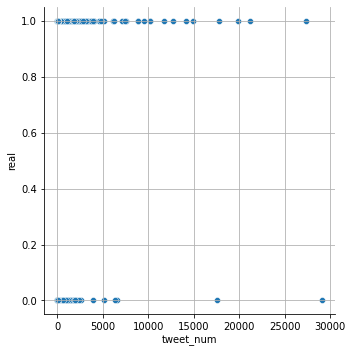

In [12]:
sns.relplot(data = FakeNews_csv, x = 'tweet_num', y = 'real')
plt.grid(True)
plt.show()

#### Observar valores únicos
Ya que se tiene una columna dedicada al dominio de la fuente de la noticia, podríamos ver si hay páginas o dominios dedicados a realizar este tipo de noticias falsas, así como las noticias sin fuente dan idea de una posible falsedad en la noticia

In [13]:
FakeNews_csv['source_domain'].unique(), len(FakeNews_csv['source_domain'].unique())

(array(['toofab.com', 'www.today.com', 'www.etonline.com', ...,
        'www.aft.org', 'www.thaivisa.com', 'flashnewscorner.com'],
       dtype=object), 2442)

Ya que observamos que solo existen 2442 diferentes fuentes de noticias, podríamos utilizar estos valores para analizarlos

#### Creación de **Ordinal Encoder**

In [14]:
from sklearn.preprocessing import LabelEncoder

encoding = LabelEncoder()
source_domain_encoded = encoding.fit_transform(FakeNews_csv['source_domain'])
source_domain_encoded

array([ 972, 2259, 1435, ..., 1668, 1634, 1207])

Copiamos el dataset en una nueva variable y modificamos la columna de `source_domain` original

In [15]:
fake_news = FakeNews_csv.copy()
fake_news.drop(columns = 'source_domain', inplace = True)

In [16]:
fake_news = pd.concat([fake_news, pd.Series(source_domain_encoded.T)], axis = 1)

In [17]:
fake_news.head()

,title,news_url,tweet_num,real,0
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,42,1,972
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,0,1,2259
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,63,1,1435
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,20,1,1354
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,38,1,2419


In [18]:
fake_news.tail()

,title,news_url,tweet_num,real,0
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,52,1,1440
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,7,0,444
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,26,1,1668
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,24,0,1634
23195,Kelly Clarkson Performs a Medley of Kendrick L...,https://www.billboard.com/articles/news/bbma/8...,85,1,1207


In [19]:
fake_news.rename(columns = {0 : 'source_domain_encoded'}, inplace = True)

In [20]:
fake_news.head()

,title,news_url,tweet_num,real,source_domain_encoded
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,42,1,972
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,0,1,2259
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,63,1,1435
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,20,1,1354
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,38,1,2419


In [21]:
fake_news = fake_news.reindex(columns = ['title', 'news_url', 'source_domain_encoded', 'tweet_num', 'real'])

In [22]:
fake_news.head()

,title,news_url,source_domain_encoded,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,972,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,2259,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,1435,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,1354,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,2419,38,1


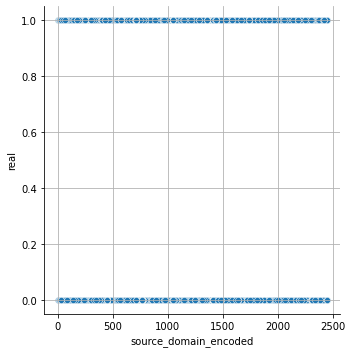

In [23]:
sns.relplot(data = fake_news, x = 'source_domain_encoded', y = 'real')
plt.grid('On')
plt.show()

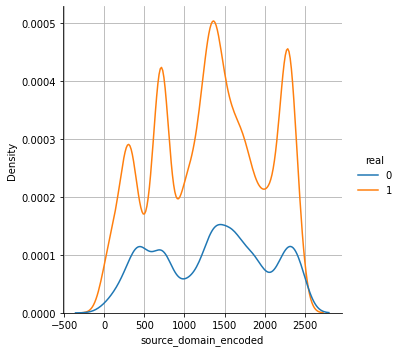

In [24]:
sns.displot(fake_news, x = 'source_domain_encoded', hue = 'real', kind = 'kde')
plt.grid(True)
plt.show()

Se puede observar que en su mayoría todos los dominios contienen noticias falsas y en algunos casos es mayor la cantidad de falsos que de reales

### Correlaciones

Solo se considera la correlación entre `tweet_num` y `real` debido a que el número de tweets sí es una cantidad representativa, por otro lado, `source_domain_encoded` no es propiamente una característica, sino una forma de representar valores no cuantitativos

In [25]:
fake_news['tweet_num'].corr(fake_news['real'])

-0.05141083114420779

Se observa una correlación muy cercana a cero, eso indica muy poca correlación, es decir, no se observa un comportamiento directo entre cambios proporcionales entre una y otra variable

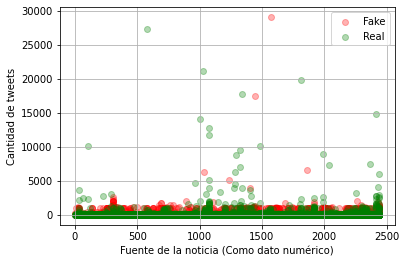

In [26]:
plt.scatter(fake_news.loc[fake_news['real'] == 0]['source_domain_encoded'], fake_news.loc[fake_news['real'] == 0]['tweet_num'], c = 'r', alpha = 0.3, label = 'Fake')
plt.scatter(fake_news.loc[fake_news['real'] == 1]['source_domain_encoded'], fake_news.loc[fake_news['real'] == 1]['tweet_num'], c = 'g', alpha = 0.3, label = 'Real')
plt.legend()
plt.grid('On')
plt.xlabel('Fuente de la noticia (Como dato numérico)')
plt.ylabel('Cantidad de tweets')
plt.show()

Ya que la variable de `source_domain_encoded` no representa algún valor que pueda ser comparado normalmente, codificaremos las demás columnas de la misma manera, así, agregando más conplejidad al modelo podrá tener características que no se tomarían en cuenta y que pudieran ser relevantes.

In [27]:
fake_news['title'].unique, fake_news['news_url'].unique

(<bound method Series.unique of 0        Kandi Burruss Explodes Over Rape Accusation on...
 1        People's Choice Awards 2018: The best red carp...
 2        Sophia Bush Sends Sweet Birthday Message to 'O...
 3        Colombian singer Maluma sparks rumours of inap...
 4        Gossip Girl 10 Years Later: How Upper East Sid...
                                ...                        
 23191    Pippa Middleton wedding: In case you missed it...
 23192    Zayn Malik & Gigi Hadid’s Shocking Split: Why ...
 23193    Jessica Chastain Recalls the Moment Her Mother...
 23194    Tristan Thompson Feels "Dumped" After Khloé Ka...
 23195    Kelly Clarkson Performs a Medley of Kendrick L...
 Name: title, Length: 23196, dtype: object>,
 <bound method Series.unique of 0        http://toofab.com/2017/05/08/real-housewives-a...
 1        https://www.today.com/style/see-people-s-choic...
 2        https://www.etonline.com/news/220806_sophia_bu...
 3        https://www.dailymail.co.uk/news/article-33

In [28]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
columns = ['title', 'news_url']
fake_news[columns] = ord_enc.fit_transform(fake_news[columns])

In [29]:
fake_news

,title,news_url,source_domain_encoded,tweet_num,real
0,10335.0,1833.0,972,42,1
1,15148.0,16046.0,2259,0,1
2,17697.0,11246.0,1435,63,1
3,4994.0,9889.0,1354,20,1
4,7186.0,17651.0,2419,38,1
...,...,...,...,...,...
23191,15258.0,11470.0,1440,52,1
23192,21173.0,728.0,444,7,0
23193,9584.0,2499.0,1668,26,1
23194,19709.0,20226.0,1634,24,0


In [30]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  23196 non-null  float64
 1   news_url               22866 non-null  float64
 2   source_domain_encoded  23196 non-null  int64  
 3   tweet_num              23196 non-null  int64  
 4   real                   23196 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 906.2 KB


In [31]:
fake_news.loc[fake_news['news_url'] == fake_news['news_url'].isnull]

,title,news_url,source_domain_encoded,tweet_num,real


In [32]:
fake_news['news_url'].fillna(0, inplace = True)

In [33]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  23196 non-null  float64
 1   news_url               23196 non-null  float64
 2   source_domain_encoded  23196 non-null  int64  
 3   tweet_num              23196 non-null  int64  
 4   real                   23196 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 906.2 KB


## Construcción de modelo de classificación

### Árbol de decisión

A partir del CART (Classification and Regression Trees) elegimos un árbol de clasificación, el cual es capaz de separar en hojas, a partir de raíces y subraíces o nodos que generan iterativamente más hojas.

![Ejemplo de estructura de un árbol de decisión](https://estructurasite.files.wordpress.com/2016/04/arboles1.jpg?w=788)

Los árboles de decisión utilizan una medida llamada _gini_ para realizar las particiones (que serán las raíces).
Esta medida mide el grado de homogeneidad o "_impureza_" de los datos de la partición hecha.

Un valor de gini iguales a cero indican nodos "_puros_" (es decir, datos que pertenecen a una sola categoría), mientras que índices mayores que cero y con valores hasta un valor de uno, indican nodos con impurezas (es decir, existen datos de más de una categoría)

$$G_i = 1 - \sum_{i=1}^{n}(P_{i,k})^2$$

Donde:

$P_i,_k \equiv$ probabilidad de la k-ésima clase i

El modelo realiza dos particiones las cuales elige la que optimice la función de costo, la cual es una medición del nivel de "_impureza_":


$$j(k,t_k) = \frac {m_{izquierda}} {m} \cdot G_{izquierda} - \frac {m_{derecho}} {m} \cdot G_{derecho}$$

Donde:


$G_{izquierda/derecha} \equiv $ Medida del índice de gini del nodo izquierdo o derecho

$m_{izquierda/derecha} \equiv $ Número de instancias en el subconjunto

De estos se elige el menor

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(random_state = 42)

### Bosques Aleatorios

Es un algoritmo que utiliza el mismo principio que loa árboles de decisión, sin embargo, agrega otras características que ayudan a que el modelo no tienda a hacer sobreajuste. De igual modo, este algoritmo también ayuda a reducir la varianza y al igual que un árbol de decisión, un sesgo bajo.

![Árboles de decisión generados dentro de un bosque aleatorio](https://www.codificandobits.com/img/posts/2021-06-04/multiples-arboles-en-un-bosque.png)

Árboles de decisión generados dentro de un bosque aleatorio


Otra característica de los bosques aleatorios es el de realizar cada árbol de decisión utilizando solo una parte de la matriz de características, es decir, algunas columnas, estas son seleccionadas de forma aleatoria, para cada nodo y a su vez en cada árbol. De igual forma, al momento de elegir la cantidad de columnas a evaluar, se utiliza un termino conocido como _Bootstrapping_ el cual, en términos generales se puede decir que el algoritmo al momento de realizar un siguiente nodo del árbol puede volver a utilizar una columna o vector característico que ya haya utilizado anteriormente.

![](https://www.codificandobits.com/img/posts/2021-06-04/seleccion-aleatoria-caracteristicas-nodo-1-arbol-1.png)

![](https://www.codificandobits.com/img/posts/2021-06-04/seleccion-aleatoria-caracteristicas-nodo-2-arbol-1.png)

Por último, la manera en que este algoritmo elige su mejor árbol es que, de todos los árboles de decisión realizados, utilizan  la _agregación_, que en términos generales es que clasifica conforme la mayor cantidad de árboles concluya un valor.

Al conjunto del proceso de _reemplazo_ (Bootstrapping) y _agregación_ se le conoce como _Bagging_, y ya que los bosques aleatorios dejan fuera los suficientes datos para poder hacer pruebas, justo esos datos utilizados para validación, son llamados _out-of-bag samples_. Por lo tanto, la clasificación con bosques aleatorios no necesita de una división de los datos entre entrenamiento y prueba.

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf_rnd = RandomForestClassifier(random_state = 42, n_jobs = -1) # utiñizar todas las CPUs disponibles

### Potencicación del gradiente (Gradient Boosting)

Los algoritmos de potenciación son algoritmos los cuales compensan el valor del resultado de su clasificación, a partir de los errores cometidos en su clasificación anterior.

**Gradient Boosting** es una generalización del algoritmo de **AdaBoosting**. Utiliza, en principio, un _weak learner_ que básicamente asigna un valor de pesos a todas las observaciones $f_1$, se predice la variable de respues $y$ y posteriormente calcula los residuos $y - f_1(x)$ y se ajusta otro model $f_2$, es decir, corrige los errores del modelo $f_1$. EL model repite este proceso M veces, así, cada modelo minimiza los residuos del modelo anterior.

$$f_1(x) \approx y$$
$$f_2(x) \approx y - \lambda f_1(x)$$
$$f_3(x) \approx y - \lambda f_1(x) - \lambda f_2(x)$$
$$
⋯
$$
$$y \approx \lambda f_1(x) + \lambda f_2(x) + \lambda f_3(x) + ⋯ + \lambda f_m(x)$$

La constante $\lambda$ es llamada _learning rate_ la cual, en términos generales es la cantidad de ajuste que cada modelo va teniendo a lo largo del algoritmo.

In [36]:
# Se utilizará el Histogram-based Gradient Boosting Classification Tree ya que es más eficientes para datasets grandes
from sklearn.ensemble import HistGradientBoostingClassifier
clf_grdt_boost = HistGradientBoostingClassifier(random_state = 42)

#### Matriz de características y vector de clases

In [37]:
import numpy as np
X = (fake_news.drop(columns = 'real')).astype('int64')
y = fake_news['real'].astype('int64')

In [38]:
X.head()

,title,news_url,source_domain_encoded,tweet_num
0,10335,1833,972,42
1,15148,16046,2259,0
2,17697,11246,1435,63
3,4994,9889,1354,20
4,7186,17651,2419,38


### Separación entre entrenamiento y prueba

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Evaluación de modelos con Cross validation

In [40]:
from sklearn.model_selection import cross_val_score

def evaluacion(modelo, X, y, cv = 10, scoring = 'accuracy'):
  """
  Función que devuelve el score de un modelo con validación cruzada

  modelo = El tipo de modelo
  X = Matriz de características
  y = Vector objetivo
  cv = Cantidad en la que se dividirá el conjunto para realizar las validaciones
  """
  cvs = cross_val_score(modelo, X, y, cv = cv, scoring = scoring)
  print(f'Score: {cvs}, Media: {cvs.mean()}, Desviación estándar: {cvs.std()}')
  return cvs

### Creación de modelos

#### Árbol de clasificación

In [41]:
clf_tree.fit(X_train, y_train)
y_tree_pred = clf_tree.predict(X_test)
clf_tree.score(X_test, y_test)

0.9797384681707142

#### Bosques aleatorios

In [42]:
clf_rnd.fit(X_train, y_train)
y_rnd_pred = clf_rnd.predict(X_test)
clf_rnd.score(X_test, y_test)

0.987210806150309

#### Potenciación del gradiente

In [43]:
clf_grdt_boost.fit(X_train, y_train)
y_boost_pred = clf_grdt_boost.predict(X_test)
clf_grdt_boost.score(X_test, y_test)

0.9856301192700101

Ya que ningún modelo nos dio un _accuracy_ lo suficientemente grande para diferenciarlo de los otros, procedemos a utilizar validación cruzada y nos quedaremos con el modelo que nos dé la menor varianza y mayor media de _accuracy_

### Cross validation

In [44]:
tree = evaluacion(clf_tree, X_train, y_train)

Score: [0.97660099 0.97906404 0.97721675 0.98091133 0.98275862 0.9796798
 0.98275862 0.978435   0.97535428 0.974122  ], Media: 0.9786901423199147, Desviación estándar: 0.0027884479653376127


In [45]:
forest = evaluacion(clf_rnd, X_train, y_train)

Score: [0.98337438 0.98399015 0.98214286 0.98830049 0.98891626 0.98460591
 0.9864532  0.98459643 0.98459643 0.98028343], Media: 0.9847259529728138, Desviación estándar: 0.0024928679719829674


In [46]:
boost = evaluacion(clf_grdt_boost, X_train, y_train)

Score: [0.98275862 0.98029557 0.98522167 0.99137931 0.98460591 0.98830049
 0.98830049 0.98582871 0.98398028 0.978435  ], Media: 0.9849106061571801, Desviación estándar: 0.003668623223534797


En este caso podríamos elegir tanto el random forest como el gradient boosting, sin embargo, lo determinante fue el tiempo de procesamiento, así que el modelo a utilizar será el **Gradient Boosting**

### Grid Search

In [47]:
from sklearn.model_selection import GridSearchCV
parametros = {'learning_rate' : [0.1, 0.05, 0.01, 0.005, 0.001]}
grid_search = GridSearchCV(clf_grdt_boost, parametros)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=HistGradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.005, 0.001]})

In [48]:
grid_search.best_params_ # Cuáles son los mejores hiperparámetros para el modelo

{'learning_rate': 0.1}

In [49]:
y_pred = clf_grdt_boost.predict(X_test)

La configuración predeterminada resultó ser el mejor modelo.
A partir de esto, veremos las métricas del performance

### Matriz de confusión

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred, labels = clf_grdt_boost.classes_)

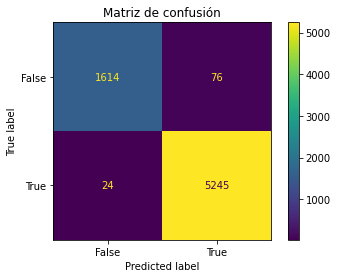

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

cnf = ConfusionMatrixDisplay(confusion_matrix, display_labels = [False, True])
cnf.plot()
plt.title('Matriz de confusión')
plt.show()

La matriz de información nos da mucha información, en este caso 1614 Verdaderos negativos ($TN$) y 5245 Verdaderos positivos ($TP$).
De igual forma, a partir de la matriz de confusión tenemos 24 Falsos negativos ($FN$) y 76 Falsos positivos ($FP$)

$$TN = 1614$$
$$TP = 5245$$
$$FN = 24$$
$$FP = 76$$


### Accuracy
La exactitud (o _accuracy_ en inglés) se refiere a lo cercano del resultado predecido del modelo con la realidad. Esta se calcula dividiendo todas los resultados verdaderos entre todos los datos

$$accuracy = \frac {TN + TP} {TN + TP + FN + FP}$$

In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9856301192700101

### Precision
La precisión, viene a ser la probabilidad de que de los positivos cuáles son verdaderamente positivos

$$precision = \frac {TP}{TP + FP}$$

In [53]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
precision

0.985716970494268

### Recall
El recall o la sensibilidad, en otro casos llamada _Tasa de verdaderos positivos_ es la probabilidad de que un valor real positivo dé positivo. Viene dada por la siguiente ecuación:

$$recall = \frac {TP}{TP + FN}$$

In [54]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
recall

0.9954450559878535

Vemos una precisión alta y sensibilidad alta, esto nos da un buen indicio de que el modelo se ajusta bien a los datos.

Para medir de mejor forma esto, existe una métrica más, la cual es llamada $f_1score$ esta es la media armónica entre la sensibilidad y la precisión, la cual se desprende de:

$$H={\frac {n}{\sum _{i=1}^{n}{\cfrac {1}{x_{i}}}}}={\frac {n}{{\cfrac {1}{x_{1}}}+\cdots +{\cfrac {1}{x_{n}}}}}$$ 

y pude escribirse como:

$$F_1score={\frac {2}{ {recall} ^{-1}+ {precision} ^{-1}}}=2 \cdot {\frac { {precision} \cdot  {recall} }{ {precision} + {recall} }}={\frac {2 \cdot {TP} }{2 \cdot {TP} + {FP} + {FN} }}$$

$\mathrm {F_1score}$

In [56]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, y_pred)
f1_score

0.9905571293673276

### Curva presición-sensibilidad

El comportamiento del crecimiento de la precisión y la sensibilidad se puede observar en una curva. _Sklearn_ tiene un módulo para observar este comportamiento.

* Primero debemos hacer un vector con las predicciones, sin embargo, esta vez no será con los valores a predecir, sino con el método de función de decisión

In [105]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf_grdt_boost, X_test, y_test, cv = 10, method = 'decision_function')

In [107]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

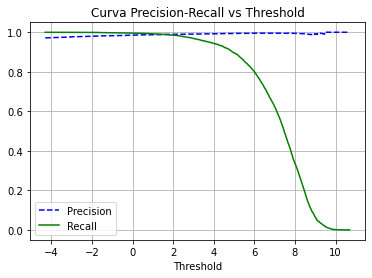

In [108]:
plt.plot(thresholds, precisions[:-1], 'b--' ,label = 'Precision')
plt.plot(thresholds, recalls[:-1], 'g', label = 'Recall')
plt.title('Curva Precision-Recall vs Threshold')
plt.grid(True)
plt.xlabel('Threshold')
plt.legend()
plt.show()

Se observa que la precisión no cambia mucho con valores pequeños del umbral, sin embargo, se observa que la sensibilidad sí.

Recall vs. Precision

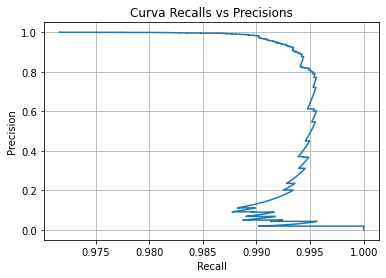

In [109]:
plt.plot(precisions, recalls)
plt.title('Curva Recalls vs Precisions')
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Se puede observar que la precisión disminuye alrededor del 99% de sensibilidad. Para esto, buscaremos el umbral de decisión que corresponde a este modelo. 

Ya que para este tipo de modelo, nos convendría una mayor precisión sin quizá no tanta sensibilidad, ya que las noticias falsas podrían ser corroboradas con el tiempo o por diferentes otros medios.

In [143]:
threshold_pred_99 = thresholds[np.argmax(precisions >= 0.99)] # Regresa el valor más grande que encuentra que cumple con esa precision
threshold_pred_99 # Umbral de decisión ideal para este caso

2.2400659253418462

In [144]:
y_test_pred_99 = (y_scores >= threshold_pred_99)
best_prec = precision_score(y_test, y_test_pred_99)
best_prec

0.9900592620913783

In [145]:
best_rec = recall_score(y_test, y_test_pred_99)
best_rec

0.9829189599544506

### Métricas modificadas

In [146]:
print(f'Antigua precisión: {precision}, Nueva presición: {best_prec}')
print(f'Antigua sensibilidad: {recall}, Nueva sensibilidad: {best_rec}')

Antigua precisión: 0.985716970494268, Nueva presición: 0.9900592620913783
Antigua sensibilidad: 0.9954450559878535, Nueva sensibilidad: 0.9829189599544506
